# 7.5.3 pandas exercise
We stopped ten people in the street and asked them what pets they have. We also recorded the person's sex and age.


In [27]:
pets = pd.DataFrame({'sex': np.array(['M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'F', 'M']),
                   'age': np.array([21, 45, 23, 56, 47, 70, 34, 30, 19, 62]),
                   'pets': np.array([['cat', 'dog'],
                                    ['hamster'],
                                    ['cat', 'gerbil'],
                                    ['fish', 'hamster', 'gerbil'],
                                    ['cat'],
                                    ['dog'],
                                    ['dog'],
                                    ['cat'],
                                    ['rabbit', 'cat'],
                                    ['dog']])})

<ipython-input-27-697f91f7354f>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  'pets': np.array([['cat', 'dog'],


We have been asked to analyse the survey responses. In particular, we have been given the questions

* What sex was the youngest respondent?
* What age was the person with the most pets?
* What was the most popular pet?
* What was the average age of dog owners?


Firstly, let's just look at the data. It's not very big so we don't actually even need to use head().

# pets

Notice here, as well, how the notebook has a nice default presentation for DataFrames. And, yes, you can customize this! We won't be going into that here.

## What sex was the youngest respondent?
Hint, you might find the .loc accessor useful here. Think about breaking this task down into creating a boolean index that is True where the value in the age column is equal to the minimum of the age column. Then select the sex column.

## <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#selection-by-label'>.loc()</a>

In [87]:
# one line of code
# pets.sex
pets.loc[pets['age'] == min(pets['age']), ['age','sex']]

,age,sex
8,19,F


We see that the youngest respondent was female (F)

## What age was the person with the most pets?
Hint, you may find _apply_ ing len as a lambda function to the pets column useful here. Remember that calling len on the pets column will just return the length of the series, which is the number of rows in the DataFrame. In fact, adding useful features to your data is a very common thing in data science, so go ahead and create a new column in our pets DataFrame and call it 'num_pets'.

## <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#apply'>.apply()</a>

In [111]:
# task: create new column 'num_pets' which contains the number of pets
# each person had (hint: this is the length of each list in the pets column)
# one line of code here:
pets['num_pets'] = pets['pets'].apply(lambda x: len(x))

In [113]:
pets['pets']

0                 [cat, dog]
1                  [hamster]
2              [cat, gerbil]
3    [fish, hamster, gerbil]
4                      [cat]
5                      [dog]
6                      [dog]
7                      [cat]
8              [rabbit, cat]
9                      [dog]
Name: pets, dtype: object


In [117]:
pets['num_pets'] = pets['pets'].apply(lambda x: len(x))

In [118]:
# view the DataFrame again to check our new column is there
pets

,sex,age,pets,num_pets
0,M,21,"[cat, dog]",2
1,M,45,[hamster],1
2,F,23,"[cat, gerbil]",2
3,M,56,"[fish, hamster, gerbil]",3
4,F,47,[cat],1
5,F,70,[dog],1
6,F,34,[dog],1
7,M,30,[cat],1
8,F,19,"[rabbit, cat]",2
9,M,62,[dog],1


In [119]:
pets.loc[pets['num_pets'] == max(pets['num_pets']), 'age']

3    56
Name: age, dtype: int64

So we see the person with the most pets was 56 years old.

## What was the most popular pet?
This is a very interesting question, given the data, because the data are arranged by respondent, not by pet. We need to _get into_ the pets column now in order to count each type of animal. To do this, we could perform a list comprehension and iterate over each list element for each Series element. But here we're going to give you a handy way to convert that Series of lists into a (longer) Series. The reason for this is to end up with another Series, which means we still have access to the powerful methods available from pandas.

## A handy way to convert that Series of lists into a (longer) Series
## <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#reshaping'>.stack()</a>
The stack() method “compresses” a level in the DataFrame’s columns.

In [139]:
pet_series = pets['pets'].apply(pd.Series).stack().reset_index(drop=True)
pet_series

0         cat
1         dog
2     hamster
3         cat
4      gerbil
5        fish
6     hamster
7      gerbil
8         cat
9         dog
10        dog
11        cat
12     rabbit
13        cat
14        dog
dtype: object

## <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#histogramming'>.value_counts()</a>

In [138]:
# task: produce an ordered count of each animal
# one line of code here:
pet_series.value_counts()

cat        5
dog        4
hamster    2
gerbil     2
fish       1
rabbit     1
dtype: int64

Cat is the most popular pet.

Note we could also have approached this task by iterating over the original pets column and collecting the animal as the key and the count as the value, but even this requires more explicit iterating and count incrementing, and we still need to iterate over the final result to find the maximum count. With our approach here, we can easily read the most popular pet animal from the top of the result.

## What was the average age of dog owners?
Hint, again here you may find it useful to use a lambda function to create a boolean index which is True if a respondent said they had a dog and False otherwise.

In [ ]:
# example
('dog' in ['dog', 'cat'], 'dog' in ['rabbit'])

In [158]:
# task: use a lambda function to test whether 'dog' is contained in each list of animals,
# extract the age column and then chain the mean method to calculate the average age.
# one line of code here:
print(
    pets.loc[pets['pets'].apply(lambda x: 'dog' in x),'age'].mean(),
    # mean(pets.loc[pets['pets'].apply(lambda x: 'dog' in x),'age']),
    min(pets.loc[pets['pets'].apply(lambda x: 'dog' in x),'age']),
    max(pets.loc[pets['pets'].apply(lambda x: 'dog' in x),'age']),
    
)

46.75 21 70


# Conclusion
You've now seen how pandas holds tabular data, where each column can be a different type (e.g. sex is character and age is a number). Furthermore, pandas provides incredibly powerful methods for slicing and dicing the data to answer some very interesting questions using relatively little code. You're well on your journey to becoming a data ninja!

# pandas
Here we will have a quick play with a pandas DataFrame and use what we've learned about accessing them to answer some questions.



## 10 minutes to pandas
<a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html'>Receipt</a>

<a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook'>Cookbook</a>

# Intro_pandas

<a href='https://www.youtube.com/embed/h8b2pvBT11I?showinfo=0&rel=0&controls=1&autoplay=1'>Lecture Movie</a>

<img src='../intro to pandas.png'>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_datareader as pdr

## 2 Get data (5 years, GOOG AMZN)

In [2]:
amzn = pdr.get_data_yahoo('AMZN','2013-04-01')
goog = pdr.get_data_yahoo('GOOG','2013-04-01')


In [3]:
print(amzn, len(amzn), list(amzn))

                   High          Low         Open        Close   Volume  \
Date                                                                      
2013-04-01   267.399994   261.010010   266.980011   261.609985  2524800   
2013-04-02   265.890015   260.549988   262.399994   263.320007  2631100   
2013-04-03   263.670013   257.750000   262.119995   259.029999  2413800   
2013-04-04   260.410004   256.119995   259.230011   259.079987  1964400   
2013-04-05   256.179993   253.669998   255.720001   255.479996  2557400   
...                 ...          ...          ...          ...      ...   
2021-04-29  3514.449951  3435.000000  3505.100098  3471.310059  7682400   
2021-04-30  3554.000000  3462.500000  3525.120117  3467.419922  7001800   
2021-05-03  3486.649902  3372.699951  3484.729980  3386.489990  5875500   
2021-05-04  3367.979980  3272.129883  3356.189941  3311.870117  5433300   
2021-05-05  3354.695068  3264.360107  3338.854980  3270.540039  3631774   

              Adj Close 

In [4]:
amzn,goog

(                   High          Low         Open        Close   Volume  \
 Date                                                                      
 2013-04-01   267.399994   261.010010   266.980011   261.609985  2524800   
 2013-04-02   265.890015   260.549988   262.399994   263.320007  2631100   
 2013-04-03   263.670013   257.750000   262.119995   259.029999  2413800   
 2013-04-04   260.410004   256.119995   259.230011   259.079987  1964400   
 2013-04-05   256.179993   253.669998   255.720001   255.479996  2557400   
 ...                 ...          ...          ...          ...      ...   
 2021-04-29  3514.449951  3435.000000  3505.100098  3471.310059  7682400   
 2021-04-30  3554.000000  3462.500000  3525.120117  3467.419922  7001800   
 2021-05-03  3486.649902  3372.699951  3484.729980  3386.489990  5875500   
 2021-05-04  3367.979980  3272.129883  3356.189941  3311.870117  5433300   
 2021-05-05  3354.695068  3264.360107  3338.854980  3270.540039  3631774   
 
          

In [5]:
list(amzn)

['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

## 3. View head, tail, info

In [6]:
amzn.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-04-01,267.399994,261.010010,266.980011,261.609985,2524800,261.609985
2013-04-02,265.890015,260.549988,262.399994,263.320007,2631100,263.320007
2013-04-03,263.670013,257.750000,262.119995,259.029999,2413800,259.029999
2013-04-04,260.410004,256.119995,259.230011,259.079987,1964400,259.079987
2013-04-05,256.179993,253.669998,255.720001,255.479996,2557400,255.479996
2013-04-08,259.679993,255.630005,255.919998,258.950012,2295600,258.950012
2013-04-09,262.609985,257.000000,258.850006,261.140015,2156600,261.140015
2013-04-10,265.980011,259.320007,261.779999,264.769989,2322500,264.769989
2013-04-11,270.970001,264.739990,264.739990,269.850006,3090500,269.850006


In [7]:
amzn.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-22,3372.870117,3301.449951,3371.679932,3309.040039,2580600,3309.040039
2021-04-23,3375.000000,3308.500000,3319.100098,3340.879883,3192800,3340.879883
2021-04-26,3428.449951,3330.939941,3348.000000,3409.000000,4880700,3409.000000
2021-04-27,3460.000000,3398.010010,3443.469971,3417.429932,3827100,3417.429932
2021-04-28,3489.879883,3425.000000,3434.800049,3458.500000,4631900,3458.500000
2021-04-29,3514.449951,3435.000000,3505.100098,3471.310059,7682400,3471.310059
2021-04-30,3554.000000,3462.500000,3525.120117,3467.419922,7001800,3467.419922
2021-05-03,3486.649902,3372.699951,3484.729980,3386.489990,5875500,3386.489990
2021-05-04,3367.979980,3272.129883,3356.189941,3311.870117,5433300,3311.870117


In [8]:
print(amzn.info(),goog.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2040 entries, 2013-04-01 to 2021-05-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2040 non-null   float64
 1   Low        2040 non-null   float64
 2   Open       2040 non-null   float64
 3   Close      2040 non-null   float64
 4   Volume     2040 non-null   int64  
 5   Adj Close  2040 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 111.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2040 entries, 2013-04-01 to 2021-05-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2040 non-null   float64
 1   Low        2040 non-null   float64
 2   Open       2040 non-null   float64
 3   Close      2040 non-null   float64
 4   Volume     2040 non-null   float64
 5   Adj Close  2040 non-null   float64
dtypes: float64(6)
memory usage: 111.6 KB
None None


## 4. Filtering using .ioc, .iloc, index

In [9]:
amzn['Open'] #This gives all the opening prices

Date
2013-04-01     266.980011
2013-04-02     262.399994
2013-04-03     262.119995
2013-04-04     259.230011
2013-04-05     255.720001
                 ...     
2021-04-29    3505.100098
2021-04-30    3525.120117
2021-05-03    3484.729980
2021-05-04    3356.189941
2021-05-05    3338.854980
Name: Open, Length: 2040, dtype: float64

In [10]:
amzn.loc[:,'Open']

Date
2013-04-01     266.980011
2013-04-02     262.399994
2013-04-03     262.119995
2013-04-04     259.230011
2013-04-05     255.720001
                 ...     
2021-04-29    3505.100098
2021-04-30    3525.120117
2021-05-03    3484.729980
2021-05-04    3356.189941
2021-05-05    3338.854980
Name: Open, Length: 2040, dtype: float64

In [11]:
amzn.loc['2021-04-01','Open']

3117.93994140625

In [12]:
amzn.iloc[0,0], amzn.iloc[1,0], list(amzn.iloc)

(267.3999938964844,
 265.8900146484375,
 [High         2.674000e+02
  Low          2.610100e+02
  Open         2.669800e+02
  Close        2.616100e+02
  Volume       2.524800e+06
  Adj Close    2.616100e+02
  Name: 2013-04-01 00:00:00, dtype: float64,
  High         2.658900e+02
  Low          2.605500e+02
  Open         2.624000e+02
  Close        2.633200e+02
  Volume       2.631100e+06
  Adj Close    2.633200e+02
  Name: 2013-04-02 00:00:00, dtype: float64,
  High         2.636700e+02
  Low          2.577500e+02
  Open         2.621200e+02
  Close        2.590300e+02
  Volume       2.413800e+06
  Adj Close    2.590300e+02
  Name: 2013-04-03 00:00:00, dtype: float64,
  High         2.604100e+02
  Low          2.561200e+02
  Open         2.592300e+02
  Close        2.590800e+02
  Volume       1.964400e+06
  Adj Close    2.590800e+02
  Name: 2013-04-04 00:00:00, dtype: float64,
  High         2.561800e+02
  Low          2.536700e+02
  Open         2.557200e+02
  Close        2.554800e

In [13]:
amzn[amzn.index >'2021-04-15']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-16,3406.800049,3355.590088,3380.000000,3399.439941,3183300,3399.439941
2021-04-19,3435.929932,3360.159912,3390.330078,3372.010010,2725400,3372.010010
2021-04-20,3382.989990,3316.000000,3373.600098,3334.689941,2623000,3334.689941
2021-04-21,3362.860107,3303.810059,3316.000000,3362.020020,2211200,3362.020020
2021-04-22,3372.870117,3301.449951,3371.679932,3309.040039,2580600,3309.040039
2021-04-23,3375.000000,3308.500000,3319.100098,3340.879883,3192800,3340.879883
2021-04-26,3428.449951,3330.939941,3348.000000,3409.000000,4880700,3409.000000
2021-04-27,3460.000000,3398.010010,3443.469971,3417.429932,3827100,3417.429932
2021-04-28,3489.879883,3425.000000,3434.800049,3458.500000,4631900,3458.500000


## 5 Filtering with criteria

In [14]:
print(f"Mean: {amzn['Volume'].mean():.3f}  Std:  {amzn['Volume'].std():.3f}")

Mean: 4116506.115  Std:  2210896.767


In [15]:
high = amzn['Volume'].mean() + 2*amzn['Volume'].std()

In [16]:
len(amzn[amzn.Volume > high]), len(amzn[amzn.Volume > high])/len(amzn)

(92, 0.045098039215686274)

## 6. Adding Columns -- like dictionary

In [17]:
amzn['pct_chng'] = amzn.Close.pct_change()

In [18]:
amzn.head()

,High,Low,Open,Close,Volume,Adj Close,pct_chng
Date,,,,,,,
2013-04-01,267.399994,261.010010,266.980011,261.609985,2524800,261.609985,NaN
2013-04-02,265.890015,260.549988,262.399994,263.320007,2631100,263.320007,0.006537
2013-04-03,263.670013,257.750000,262.119995,259.029999,2413800,259.029999,-0.016292
2013-04-04,260.410004,256.119995,259.230011,259.079987,1964400,259.079987,0.000193
2013-04-05,256.179993,253.669998,255.720001,255.479996,2557400,255.479996,-0.013895


## 7 Appending data

In [19]:
goog_04 = goog.loc['2021-04']
amzn_04 = amzn.loc['2021-04']

In [20]:
goog_04.append(amzn_04).head(90)

,High,Low,Open,Close,Volume,Adj Close,pct_chng
Date,,,,,,,
2021-04-01,2142.939941,2096.889893,2097.949951,2137.750000,1699000.0,2137.750000,NaN
2021-04-05,2237.310059,2151.620117,2152.939941,2225.550049,2164900.0,2225.550049,NaN
2021-04-06,2237.659912,2214.800049,2222.500000,2224.750000,1353000.0,2224.750000,NaN
2021-04-07,2255.000000,2225.330078,2226.129883,2249.679932,1289900.0,2249.679932,NaN
2021-04-08,2284.004883,2257.679932,2277.959961,2265.439941,1358300.0,2265.439941,NaN
2021-04-09,2289.040039,2253.714111,2256.699951,2285.879883,1044400.0,2285.879883,NaN
2021-04-12,2275.320068,2238.465088,2266.250000,2254.790039,1565900.0,2254.790039,NaN
2021-04-13,2277.209961,2256.090088,2261.469971,2267.270020,1165500.0,2267.270020,NaN
2021-04-14,2277.989990,2249.189941,2275.159912,2254.840088,1011000.0,2254.840088,NaN


In [21]:
goog_04.append(amzn_04).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2021-04-01 to 2021-04-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       42 non-null     float64
 1   Low        42 non-null     float64
 2   Open       42 non-null     float64
 3   Close      42 non-null     float64
 4   Volume     42 non-null     float64
 5   Adj Close  42 non-null     float64
 6   pct_chng   21 non-null     float64
dtypes: float64(7)
memory usage: 2.6 KB


In [22]:
goog_04.append(amzn_04).tail()

,High,Low,Open,Close,Volume,Adj Close,pct_chng
Date,,,,,,,
2021-04-26,3428.449951,3330.939941,3348.000000,3409.000000,4880700.0,3409.000000,0.020390
2021-04-27,3460.000000,3398.010010,3443.469971,3417.429932,3827100.0,3417.429932,0.002473
2021-04-28,3489.879883,3425.000000,3434.800049,3458.500000,4631900.0,3458.500000,0.012018
2021-04-29,3514.449951,3435.000000,3505.100098,3471.310059,7682400.0,3471.310059,0.003704
2021-04-30,3554.000000,3462.500000,3525.120117,3467.419922,7001800.0,3467.419922,-0.001121


## 8 Merging Columns from Different DataFrames
with pandas

In [23]:
close = pd.DataFrame({'AMZN':amzn.Close, 'GOOG':goog.Close})
close.head()

,AMZN,GOOG
Date,,
2013-04-01,261.609985,399.099091
2013-04-02,263.320007,405.001953
2013-04-03,259.029999,401.594727
2013-04-04,259.079987,396.050507
2013-04-05,255.479996,390.062958


## 9 Grouping and Sorting

.resample('M') => resample by month

.mean => get a average volume. (In this case, monthly volume of goog)

<AxesSubplot:xlabel='Date'>

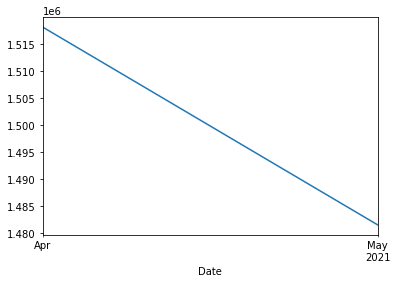

In [24]:
goog['Volume'][goog.index > '2021-04-15'].resample('M').mean().plot()

## 10 Cumulative Sum and Rolling Calculations

In [25]:
amzn_change = np.log(amzn.Close/amzn.Close.shift(1))
#.shift(1) menas following date.
goog_change = np.log(goog.Close/goog.Close.shift(1))

<AxesSubplot:xlabel='Date'>

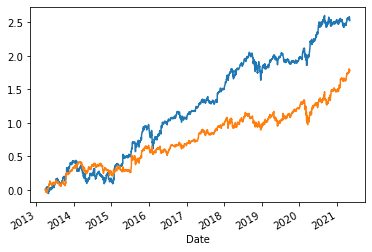

In [26]:
amzn_change.cumsum().plot()
#.cumcum() means cumulative sum.
goog_change.cumsum().plot()

## 11 Crate new dataFrame and save to csv

In [38]:
new = pd.DataFrame({'AMZN':amzn_change[1:],'GOOG':goog_change[1:]})
new.head()


,AMZN,GOOG
Date,,
2013-04-02,0.006515,0.014682
2013-04-03,-0.016426,-0.008448
2013-04-04,0.000193,-0.013902
2013-04-05,-0.013993,-0.015234
2013-04-08,0.013491,-0.010527


In [39]:
new.to_csv('stocks.csv')
# This does not have path. So, ??it will be stored at home directory...?

In [37]:
# import data
pd.read_csv('stocks.csv').head()

,Date,AMZN,GOOG
0,2013-04-02,0.006515,0.014682
1,2013-04-03,-0.016426,-0.008448
2,2013-04-04,0.000193,-0.013902
3,2013-04-05,-0.013993,-0.015234
4,2013-04-08,0.013491,-0.010527


## 12 Change hte index => xxx.index = xxx.yyy
## and remove columns => xxx.drop()

In [67]:
new_stocks = pd.read_csv('stocks.csv')

new_stocks.index = new_stocks.Date
#This is adding a new index column

new_stocks.head()

,Date,AMZN,GOOG
Date,,,
2013-04-02,2013-04-02,0.006515,0.014682
2013-04-03,2013-04-03,-0.016426,-0.008448
2013-04-04,2013-04-04,0.000193,-0.013902
2013-04-05,2013-04-05,-0.013993,-0.015234
2013-04-08,2013-04-08,0.013491,-0.010527


In [68]:
new_stocks.drop(['Date'], axis=1, inplace=True)
#axis0 = row, axis1=column
new_stocks.head()

,AMZN,GOOG
Date,,
2013-04-02,0.006515,0.014682
2013-04-03,-0.016426,-0.008448
2013-04-04,0.000193,-0.013902
2013-04-05,-0.013993,-0.015234
2013-04-08,0.013491,-0.010527


## 13 Rename Columns

In [70]:
new_stocks.rename(columns={'AMZN':'AMZN_chng'}, inplace=True)
new_stocks.head()

,AMZN_chng,GOOG
Date,,
2013-04-02,0.006515,0.014682
2013-04-03,-0.016426,-0.008448
2013-04-04,0.000193,-0.013902
2013-04-05,-0.013993,-0.015234
2013-04-08,0.013491,-0.010527
